(test-functions:rs-circular-bar)=
# Circular Bar RS Reliability Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The circular bar RS reliability problem from {cite}`Verma2015` is a variation
on a theme of the classic RS reliability problem. This particular variant
put it in the context of a circular bar subjected to an axial force.

The plots of the function are shown below. The left plot shows the surface
plot of the performance function, the center plot shows the contour
plot with a single contour line at function value of $0.0$ (the limit-state
surface), and the right plot shows the same plot with $10^6$ sample points
overlaid.

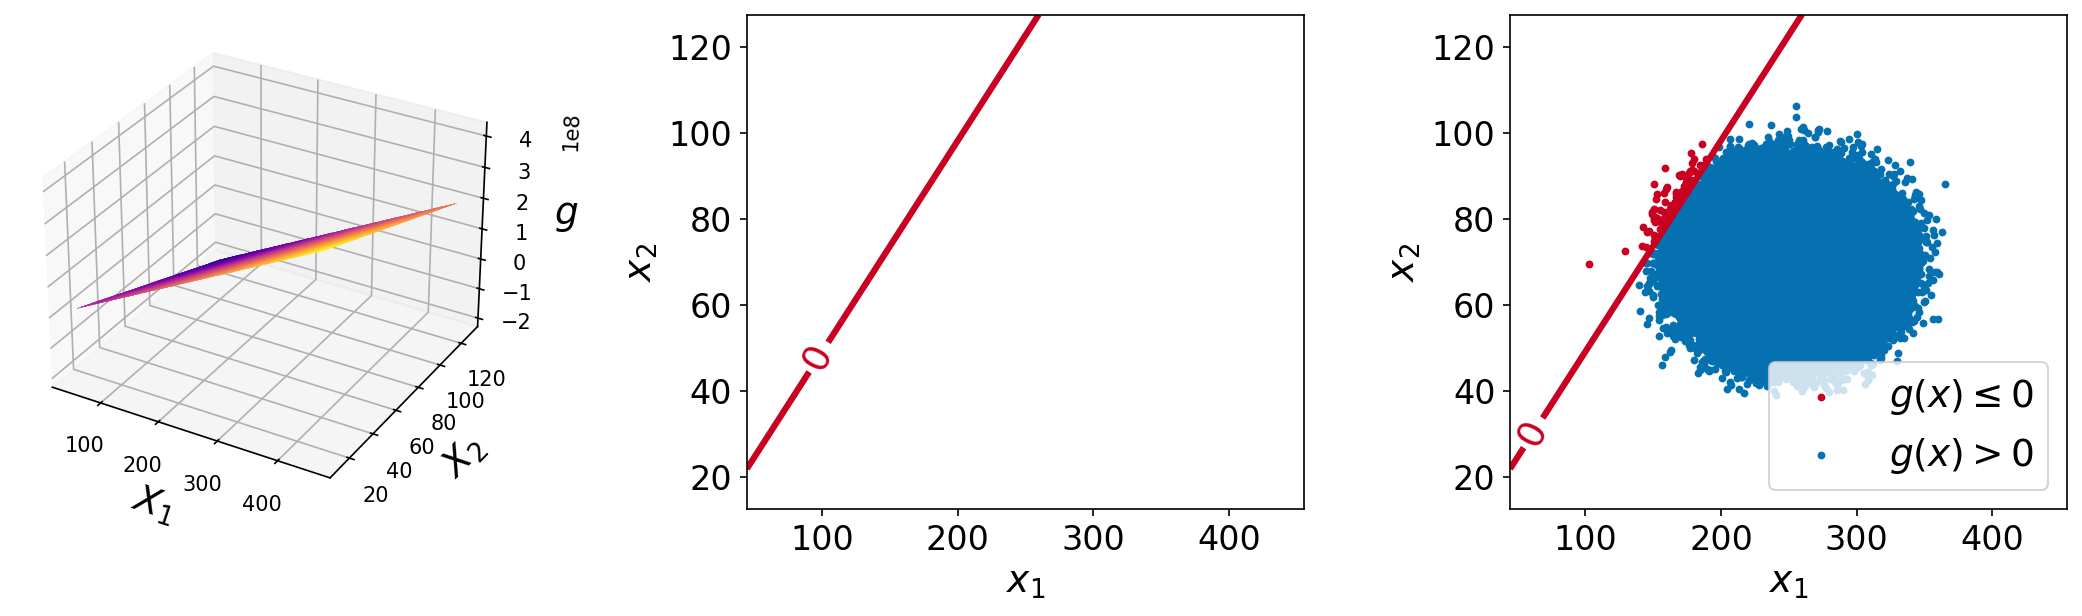

In [2]:
my_fun = uqtf.RSCircularBar()
my_fun.prob_input.reset_rng(237324)
xx = my_fun.prob_input.get_sample(1000000)
yy = my_fun(xx)
idx_neg = yy <= 0.0
idx_pos = yy > 0.0

lb_1 = my_fun.prob_input.marginals[0].lower
ub_1 = my_fun.prob_input.marginals[0].upper
lb_2 = my_fun.prob_input.marginals[1].lower
ub_2 = my_fun.prob_input.marginals[1].upper

# Create 2-dimensional grid
xx_1 = np.linspace(lb_1, ub_1, 1000)[:, np.newaxis]
xx_2 = np.linspace(lb_2, ub_2, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1, xx_2)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create the plot
fig = plt.figure(figsize=(15, 5))

# Surface
axs_0 = plt.subplot(131, projection='3d')
axs_0.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_0.set_xlabel("$X_1$", fontsize=18)
axs_0.set_ylabel("$X_2$", fontsize=18)
axs_0.set_zlabel("$g$", fontsize=18)

# Contour plot
axs_1 = plt.subplot(132)
cf = axs_1.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_1.set_xlim([lb_1, ub_1])
axs_1.set_ylim([lb_2, ub_2])
axs_1.set_xlabel("$x_1$", fontsize=18)
axs_1.set_ylabel("$x_2$", fontsize=18)
axs_1.tick_params(labelsize=16)
axs_1.clabel(cf, inline=True, fontsize=18)

# Scatter plot
axs_2 = plt.subplot(133)
cf = axs_2.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_2.scatter(
    xx[idx_neg, 0],
    xx[idx_neg, 1],
    color="#ca0020",
    marker=".",
    s=30,
    label="$g(x) \leq 0$"
)
axs_2.scatter(
    xx[idx_pos, 0],
    xx[idx_pos, 1],
    color="#0571b0",
    marker=".",
    s=30,
    label="$g(x) > 0$"
)
axs_2.set_xlim([lb_1, ub_1])
axs_2.set_ylim([lb_2, ub_2])
axs_2.set_xlabel("$x_1$", fontsize=18)
axs_2.set_ylabel("$x_2$", fontsize=18)
axs_2.tick_params(labelsize=16)
axs_2.clabel(cf, inline=True, fontsize=18)
axs_2.legend(fontsize=18, loc="lower right");

fig.tight_layout(pad=4.0);
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.RSCircularBar()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : RSCircularBar
Spatial dimension : 2
Description       : RS problem as a circular bar from Verma et al. (2016)


## Description

The reliability problem consists of a carbon-steel circular bar subjected 
to an axial force.
The test function (i.e., the performance function) is analytically defined
as follows[^location]:

$$
g(\boldsymbol{x}; p) = Y - \frac{F}{\frac{1}{4} \pi d^2},
$$

where $\boldsymbol{x} = \{ Y, F \}$ is the two-dimensional vector of
input variables probabilistically defined further below;
and $p = \{ d \}$ is the deterministic parameter of the function.

The failure state and the failure probability are defined as
$g(\boldsymbol{x}; p) \leq 0$
and $\mathbb{P}[g(\boldsymbol{X}; p) \leq 0]$, respectively.

## Probabilistic input

Based on {cite}`Verma2015`, the probabilistic input model for
the test function consists of two independent standard normal random variables
(see the table below).

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='normal', parameters=array([250.,  25.]), name='Y', description='Material mean yield strength [MPa]'), UnivDist(distribution='normal', parameters=array([70.,  7.]), name='F', description='Force mean value [kN]')), copulas=None, name='RSCircularBar-Verma2016', description='Input model for the circular bar RS from Verma et al. (2016)')

## Parameter

The parameter of the function is $d$ which from {cite}`Verma2015` is set to
$25\;\mathrm{[mm]}$.

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $10^6$ random points:

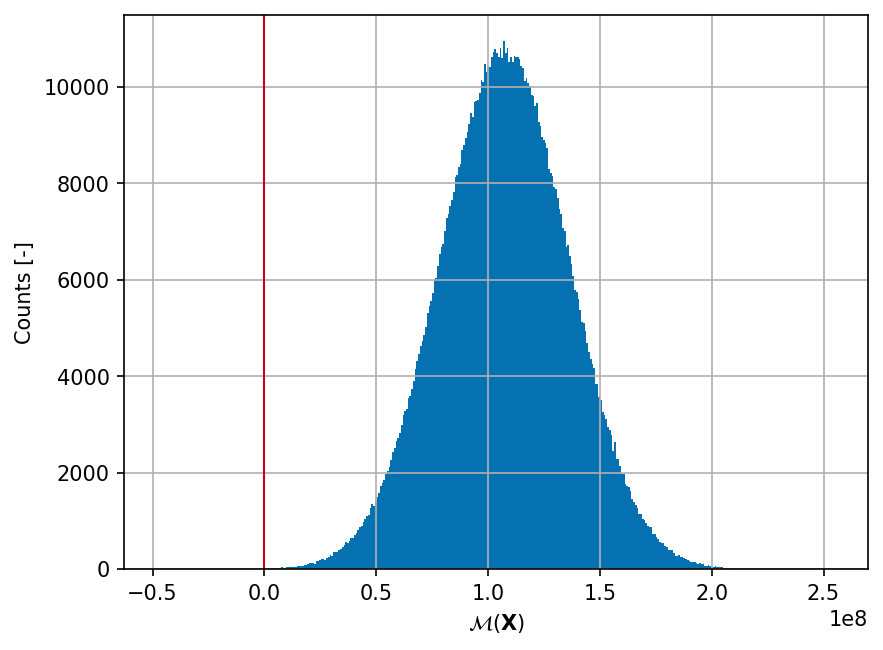

In [6]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    This is taken from:
    https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting
    
    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

xx_test = my_testfun.prob_input.get_sample(1000000)
yy_test = my_testfun(xx_test)
yy_test = yy_test[~is_outlier(yy_test, thresh=10)]
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = plt.hist(yy_test, bins="auto", color="#0571b0")
plt.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
plt.axvline(0, linewidth=1.0, color="#ca0020")

plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.gcf().set_dpi(150);

### Failure probability ($P_f$)

Some reference values for the failure probability $P_f$ from the literature
are summarized in the table below.

|    Method    |   $N$    |       $\hat{P}_f$       | $\mathrm{CoV}[\hat{P}_f]$ |      Source       | Remark                   |
|:------------:|:--------:|:-----------------------:|:-------------------------:|:-----------------:|--------------------------|
| {term}`FOSM` |   $12$   | $9.4231 \times 10^{-5}$ |          &#8212;          | {cite}`Verma2015` | $\beta = 3.734$ (p. 261) |

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Example 1, Chapter 8, p. 260 in {cite}`Verma2015`.